<a href="https://colab.research.google.com/github/Manihrii/Mall-Customer-Segmentation/blob/main/Mall_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [2]:
#loading to the data from csv file to a pandas Dataframe
customer_data = pd.read_csv("Mall_Customers.csv")

In [3]:
#loading first 5 dataset rows
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#customer data info
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#to find any null values in the data set
customer_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
#to drop columns
X = customer_data.drop(columns=['CustomerID','Genre','Age'], axis=1)

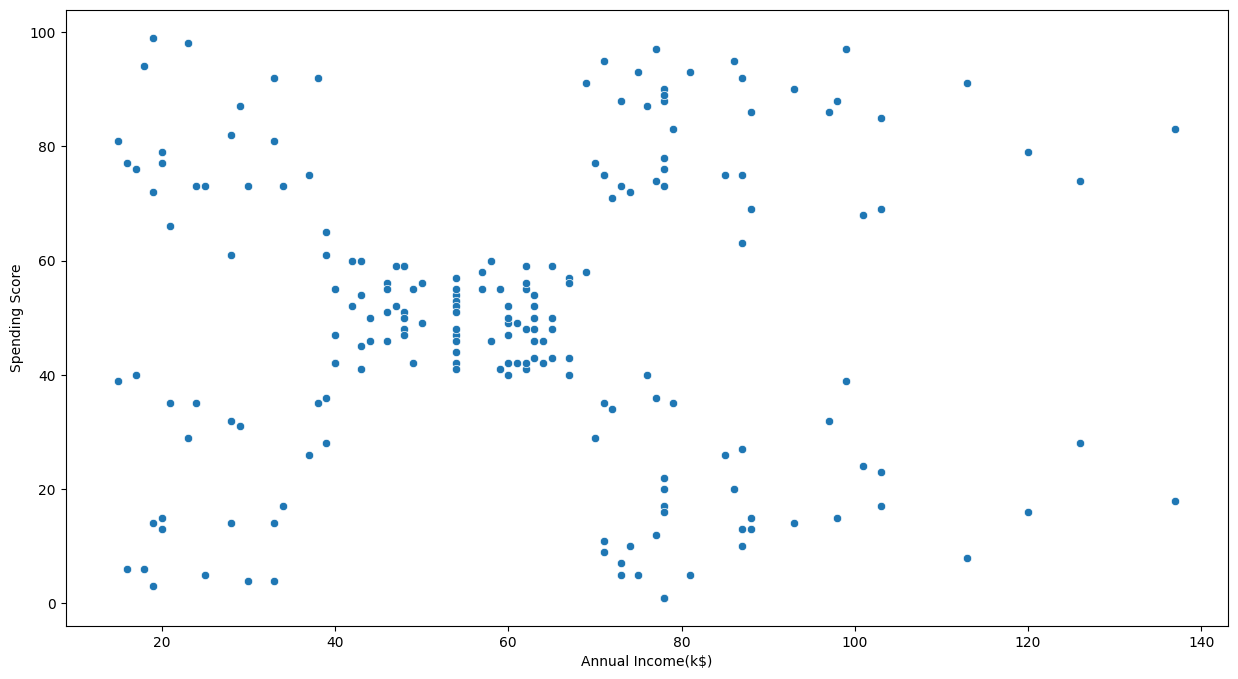

In [7]:
#visualize the data points
plt.figure(figsize=(15,8))
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)']) # Use column names to access data
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

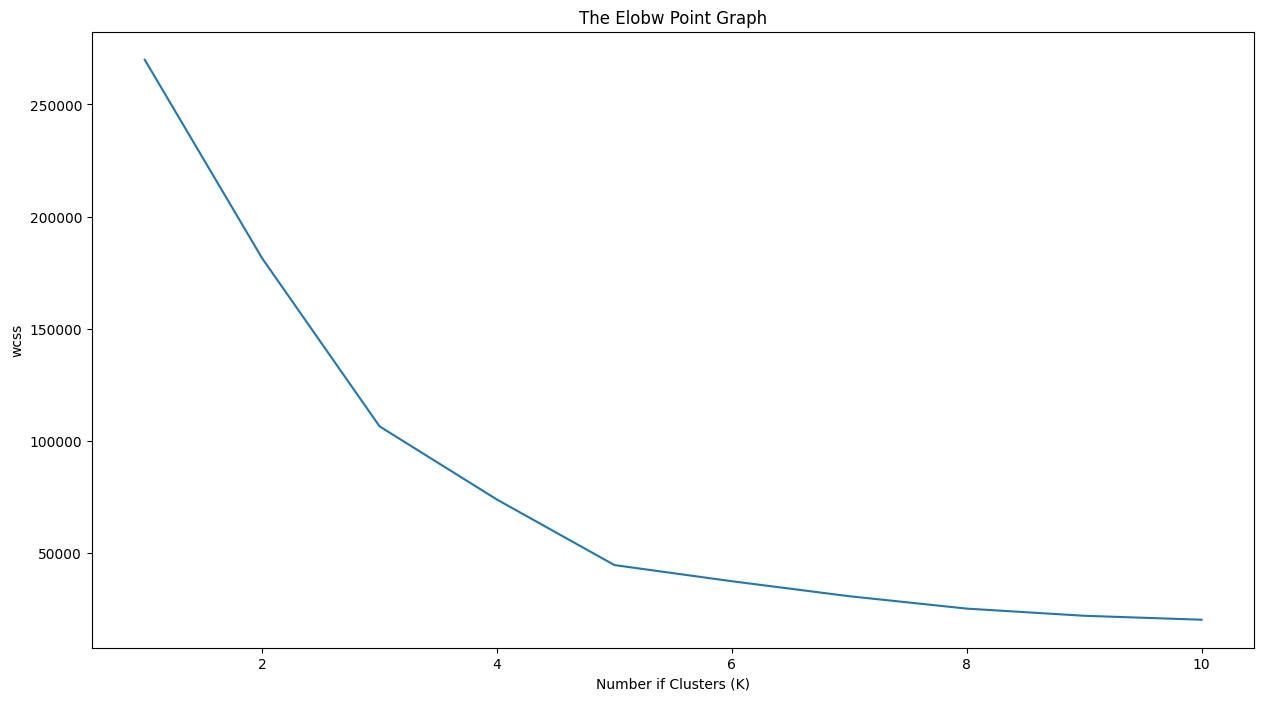

In [8]:
#finding the K using the elbow method
wcss = []
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init = 'k-means++',random_state=2)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(range(1,11),wcss)
plt.title('The Elobw Point Graph')
plt.xlabel('Number if Clusters (K)')
plt.ylabel('wcss')
plt.show()

wcss doesn't  reduce much after k=5 , So,we can choose 5 as the perfect K value or clusters.

In [9]:
#Training the K-means algorith on the training dataset
kmeans= KMeans(n_clusters = 5, init='k-means++',random_state=0)
Y = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
#Centroid Points
kmeans.cluster_centers_


array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

Visualize  the clusters formed

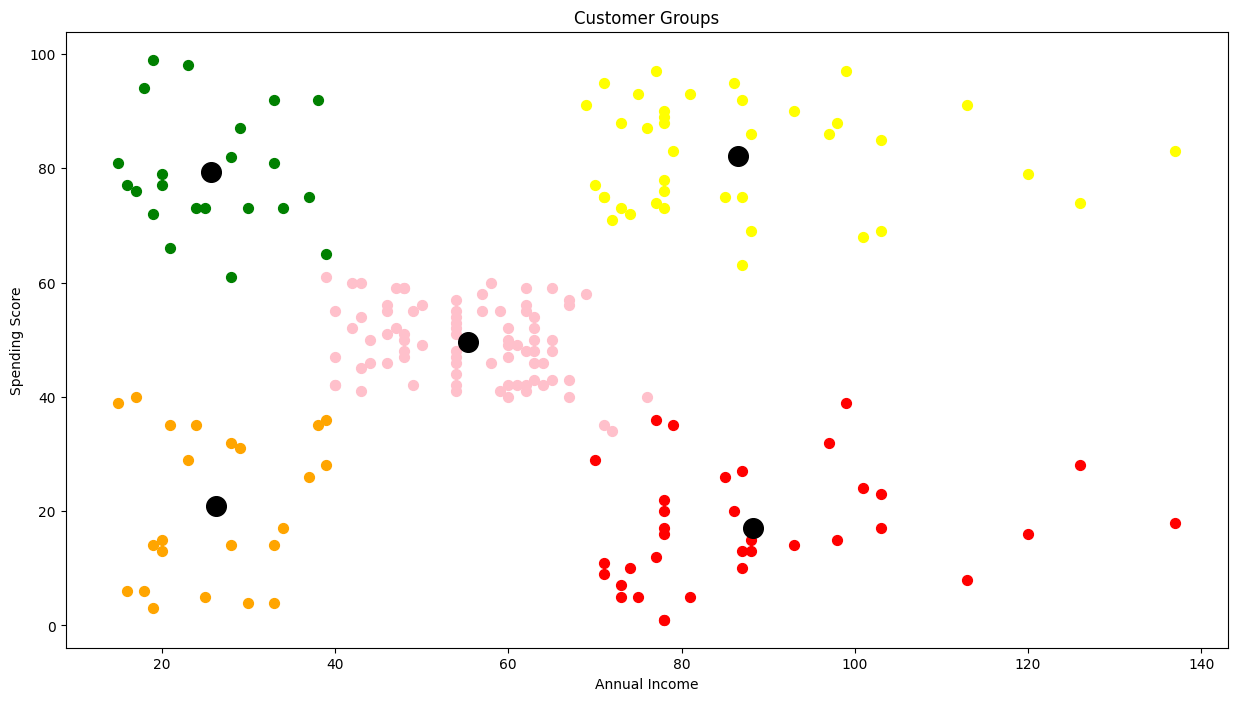

In [11]:

plt.figure(figsize=(15,8))
plt.scatter(X.loc[Y==0, 'Annual Income (k$)'], X.loc[Y==0, 'Spending Score (1-100)'], s=50, c='red', label='Cluster 1')
plt.scatter(X.loc[Y==1, 'Annual Income (k$)'], X.loc[Y==1, 'Spending Score (1-100)'], s=50, c='pink', label='Cluster 2')
plt.scatter(X.loc[Y==2, 'Annual Income (k$)'], X.loc[Y==2, 'Spending Score (1-100)'], s=50, c='yellow', label='Cluster 3')
plt.scatter(X.loc[Y==3, 'Annual Income (k$)'], X.loc[Y==3, 'Spending Score (1-100)'], s=50, c='green', label='Cluster 4')
plt.scatter(X.loc[Y==4, 'Annual Income (k$)'], X.loc[Y==4, 'Spending Score (1-100)'], s=50, c='orange', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', label='c')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

We see five clusters formed
The black dots represent the centroid for each cluster